In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
import matplotlib.pyplot as plt

In [3]:
# Generating synthetic insurance claim data
np.random.seed(42)
date_range = pd.date_range(start='1/1/2010', periods=120, freq='ME')
rainfall = np.random.normal(loc=5, scale=2, size=len(date_range))
claims = 100 + 20 * rainfall + np.random.normal(loc=0, scale=15, size=len(date_range))


In [5]:
# Creating a DataFrame
df = pd.DataFrame({'Date': date_range, 'Rainfall': rainfall, 'Claims': claims})
df.set_index('Date', inplace=True)
df

,Rainfall,Claims
Date,,
2010-01-31,5.993428,231.734045
2010-02-28,4.723471,180.828616
2010-03-31,6.295377,246.949456
2010-04-30,8.046060,239.893428
2010-05-31,4.531693,199.436721
...,...,...
2019-08-31,5.603095,221.570679
2019-09-30,4.930576,168.234390
2019-10-31,2.662644,156.049693


In [6]:
# Scaling the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['Claims']])

In [7]:
# Creating a dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(df_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [8]:
# Splitting the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

In [12]:
# Creating the LSTM model
model = Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [43]:
# Compiling and training the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=1, epochs=200)

Epoch 1/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0404
Epoch 2/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0374
Epoch 3/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0448
Epoch 4/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0515
Epoch 5/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0514
Epoch 6/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0345
Epoch 7/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0313
Epoch 8/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0516
Epoch 9/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0375
Epoch 10/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0375
Epoch 11/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0489
Epoch 12/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0360
Epoch 13/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0325
Epoch 14/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0343
Epoch 15/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0393  
Ep

In [44]:
# Making predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
test_predict


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000014C145653A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.23819186],
       [0.01589323],
       [0.14878453],
       [0.44400296],
       [0.2919805 ],
       [0.6482021 ],
       [0.4495808 ],
       [0.47146988],
       [0.38157323],
       [0.2253295 ],
       [0.34694493],
       [0.2570101 ],
       [0.5092802 ],
       [0.28323346],
       [0.7028484 ],
       [0.71841955],
       [0.6873528 ],
       [0.76317143],
       [0.65845716],
       [0.01221842],
       [0.53009415],
       [0.71999454]], dtype=float32)

In [45]:
# Inverse scaling for predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
test_predict

array([[143.29012],
       [100.84268],
       [126.21798],
       [182.5893 ],
       [153.56093],
       [221.58067],
       [183.65436],
       [187.83403],
       [170.66847],
       [140.83408],
       [164.05627],
       [146.8834 ],
       [195.05383],
       [151.8907 ],
       [232.01524],
       [234.98853],
       [229.05638],
       [243.5338 ],
       [223.53883],
       [100.14099],
       [199.0282 ],
       [235.28926]], dtype=float32)

In [46]:
# Creating the correct ranges for plotting
train_plot = np.empty_like(df_scaled)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_plot = np.empty_like(df_scaled)
test_plot[:, :] = np.nan
test_start = len(train_predict)
test_end = len(train_predict) + len(test_predict)
test_plot[test_start:test_end, :] = test_predict

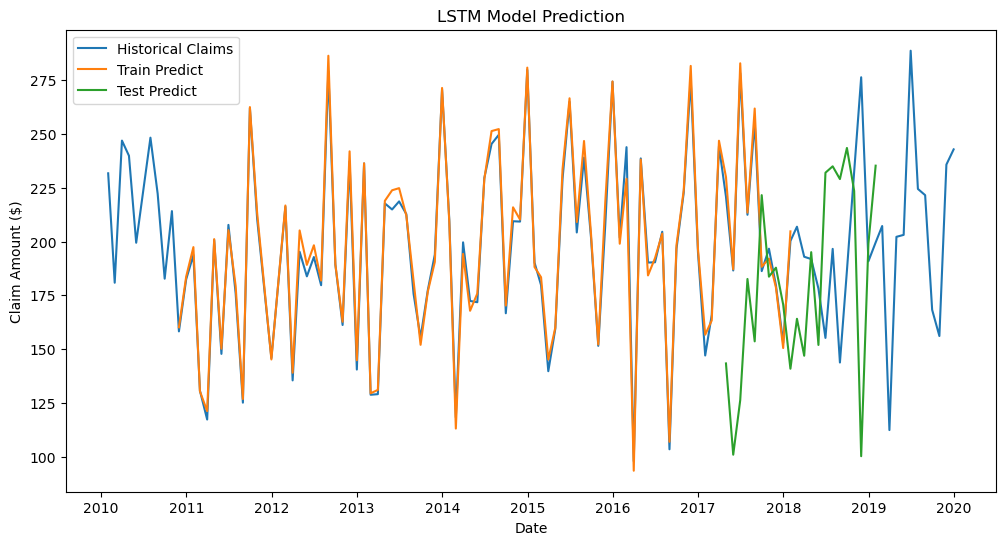

In [47]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Claims'], label='Historical Claims')
plt.plot(df.index, train_plot, label='Train Predict')
plt.plot(df.index, test_plot, label='Test Predict')
plt.title('LSTM Model Prediction')
plt.xlabel('Date')
plt.ylabel('Claim Amount ($)')
plt.legend()
plt.show()